DATA SCIENCE

T094 : Shubhangi Mane

Practical 4 :

AIM : Hypothesis Testing
Formulate null and alternative hypotheses for a given problem.
Conduct a hypothesis test using appropriate statistical tests (e.g., t-test, chi-
square test).
 Interpret the results and draw conclusions based on the test outcomes.


Code for Hypothesis Testing
One-sample Hypothesis Test Example
Testing if the average score of Group A is 70:

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats

# Load dataset
df = pd.read_csv("student_exam_scores.csv")

# Extract Group A
data = df[df['group'] == 'A']['score']
print("Sample Data:", data.head().values)

# Hypotheses
H0 = "The average score of Group A is 70."
H1 = "The average score of Group A is less than 70."

# One-sample t-test
t_stat, p_value = stats.ttest_1samp(data, 70)

print("T-statistic:", t_stat)
print("p-value:", p_value)

# One-tailed for lower direction
p_one_tailed = p_value / 2

if (t_stat < 0) and (p_one_tailed < 0.05):
    print("Reject the null hypothesis. Mean is less than 70.")
else:
    print("Fail to reject the null hypothesis.")


Sample Data: [60.40058578 74.98141813 69.98084949 57.455937   63.94979824]
T-statistic: -3.779117148244901
p-value: 0.00020792171025014463
Reject the null hypothesis. Mean is less than 70.


A two-sample t-test

 checks whether two independent groups have different mean values.

Groups must be independent (not the same people measured twice)

Data should be continuous

Test checks whether mean(Group A) ≠ mean(Group B)

This is similar to testing:

“Is Week 1 average different from Week 2 average?”

But in dataset:

“Is Group A’s average score different from Group B’s?”

Group A = scores for 200 students

Group B = scores for 200 students

Goal: Check if the two groups have significantly different exam scores.

Null Hypothesis (H₀):

There is no difference in the average exam scores of Group A and Group B.

H₀: μA = μB

Alternative Hypothesis (H₁):

There is a difference between the average exam scores of Group A and Group B.

H₁: μA ≠ μB
(two-tailed test)

In [ ]:
import pandas as pd

# Load your dataset
df = pd.read_csv("student_exam_scores.csv")

# Split into week1 and week2 (Group A and Group B)
week1 = df[df["group"] == "A"]["score"]
week2 = df[df["group"] == "B"]["score"]

# Print data like your example
print("Week 1 data :-\n")
print(week1.to_string(index=False))

print("\nWeek 2 data :-\n")
print(week2.to_string(index=False))


Week 1 data :-

60.400586
74.981418
69.980849
57.455937
63.949798
79.560056
51.013245
64.997612
76.861554
61.932817
63.247797
67.337037
78.439727
63.527686
64.892126
64.959541
83.441511
83.307503
75.028377
70.703305
73.161580
78.435124
61.449163
76.230803
59.222835
63.535739
74.349736
57.999235
67.019519
61.967716
66.210664
48.409876
55.599268
63.100859
74.492237
66.784550
68.019921
72.817559
61.843246
69.985391
62.362434
55.906314
65.263701
72.016641
70.370123
67.917187
84.746557
70.890385
74.851152
83.667003
58.941403
60.728483
80.205986
62.413561
68.207783
75.485212
74.234945
80.284203
78.469509
75.485749
62.591039
73.564039
70.199904
58.716142
77.921093
73.650656
68.318431
66.368356
59.611892
69.396669
71.279074
62.181915
76.135428
60.319579
53.138298
75.278090
65.176438
67.117793
62.137383
56.758261
76.786662
63.177917
79.626667
73.651157
65.796693
60.398683
62.872766
59.512338
82.609794
69.151089
76.051439
59.128536
69.267246
76.245034
65.654925
75.217801
60.408025
58.455699
70.6

In [ ]:
import pandas as pd
from scipy.stats import ttest_ind

# Load your dataset
df = pd.read_csv("student_exam_scores.csv")

# Separate the two groups
group_A = df[df["group"] == "A"]["score"]
group_B = df[df["group"] == "B"]["score"]

# Perform Independent Two-Sample t-test
t_stat, p_value = ttest_ind(group_A, group_B)

# Print results
print("Mean of Group A:", group_A.mean())
print("Mean of Group B:", group_B.mean())
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: The groups have significantly different scores.")
else:
    print("Fail to reject the null hypothesis: No significant difference between groups.")


Mean of Group A: 68.02650729053076
Mean of Group B: 71.08510639101249
T-statistic: -4.130275658649762
P-value: 4.417966045535878e-05
Reject the null hypothesis: The groups have significantly different scores.


Paired sampled t-test :-

dataset has Group A and Group B — they are independent students.
assume that each student was tested twice, for example:

Test 1 (Before training)

Test 2 (After training)

So now every student has two related scores.
Null Hypothesis (H₀):

There is no mean difference between Test 1 and Test 2 scores.

H₀: μ₍difference₎ = 0

Alternative Hypothesis (H₁):

There is a mean difference between Test 1 and Test 2 scores.

H₁: μ₍difference₎ ≠ 0



In [ ]:
import pandas as pd
from scipy.stats import ttest_rel
import numpy as np

# Load the dataset
df = pd.read_csv("student_exam_scores.csv")

# Create paired scores
# Test1 = original score
# Test2 = score + random improvement (simulating training/test2)
np.random.seed(42)
df["test1"] = df["score"]
df["test2"] = df["score"] + np.random.normal(2, 3, len(df))  # improvement of ~2 points

# Paired t-test
t_stat, p_value = ttest_rel(df["test1"], df["test2"])

print("Test Statistic:", t_stat)
print("P-value:", p_value)

# Interpretation
if p_value < 0.05:
    print("Reject H0: There is a significant difference between Test1 and Test2.")
else:
    print("Fail to reject H0: No significant difference between Test1 and Test2.")


Test Statistic: -14.354097563980188
P-value: 5.769995895666382e-38
Reject H0: There is a significant difference between Test1 and Test2.


use a Z-test when:

Sample size > 30
YOUR dataset has 400 students → Z-test allowed

Data points are independent
Each student’s score is independent → OK

Data is approximately normal
 Large sample size → Normality is not a problem

Random sampling
Assuming your dataset simulates a random sample

Population standard deviation (σ) is known
For Z-test, we must assume or define population σ
(we usually choose σ = 10 or 12 for exam score examples)

Question:

Is the average exam score equal to 70?

Null Hypothesis (H₀):

μ = 70
(The population mean exam score is 70)

Alternative Hypothesis (H₁):

μ ≠ 70
(The population mean is NOT 70)

In [ ]:
import pandas as pd
import numpy as np
from math import sqrt
from scipy.stats import norm

# Load your dataset
df = pd.read_csv("student_exam_scores.csv")
data = df["score"]

# Known population standard deviation (assumed)
sigma = 10

# Hypothesized mean
mu_0 = 70

# Sample statistics
sample_mean = np.mean(data)
n = len(data)

# Z-test statistic formula
z_stat = (sample_mean - mu_0) / (sigma / sqrt(n))

# Two-tailed p-value
p_value = 2 * (1 - norm.cdf(abs(z_stat)))

print("Sample Mean:", sample_mean)
print("Z Statistic:", z_stat)
print("P-value:", p_value)

if p_value < 0.05:
    print("Reject H0: The exam score mean is significantly different from 70.")
else:
    print("Fail to reject H0: The exam score mean is NOT significantly different from 70.")


Sample Mean: 69.55580684077162
Z Statistic: -0.8883863184567531
P-value: 0.3743329822568553
Fail to reject H0: The exam score mean is NOT significantly different from 70.


Chi-Square Test

Is there a relationship between a student’s Group (A/B) and their Exam Result (Pass/Fail)?

Null Hypothesis (H₀):

There is no association between group and exam result.
Group and pass/fail are independent.

Alternative Hypothesis (H₁):

There is an association between group and exam result.
Certain groups may pass more than others.

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Load your dataset
df = pd.read_csv("student_exam_scores.csv")

# Create pass/fail categorical column
df["result"] = np.where(df["score"] >= 60, "Pass", "Fail")

# Create contingency table
contingency_table = pd.crosstab(df["group"], df["result"])
print("Contingency Table:\n")
print(contingency_table)

# Perform Chi-Square Test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("\nChi-Square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-value:", p_value)

# Interpretation
if p_value < 0.05:
    print("\nReject H0: There is a significant relationship between group and exam result.")
else:
    print("\nFail to reject H0: No significant relationship between group and exam result.")


Contingency Table:

result  Fail  Pass
group             
A         24   176
B         12   188

Chi-Square Statistic: 3.6935286935286937
Degrees of Freedom: 1
P-value: 0.05462393825457165

Fail to reject H0: No significant relationship between group and exam result.


DATA SCIENCE

practical NO : 5

T094 : Shubhangi Mane

AIM : ANOVA (Analysis of Variance)
Perform one-way ANOVA to compare means across multiple groups.
 Conduct post-hoc tests to identify significant differences between group means.

One-Way ANOVA (F-TEST)

dataset has:

Group A scores

Group B scores

But ANOVA requires 3 or more groups.

So we will create a third group (Group C) from your existing score data to perform a true ANOVA test.

Group A
Group B
Group C (newly created from random sampling of your data)

Now we can apply One-Way ANOVA.

Why ANOVA?

A t-test compares two groups.
ANOVA compares three or more groups at once without increasing false positive error.

Hypotheses for ANOVA
Null Hypothesis (H₀):

The mean exam scores of Group A, Group B, and Group C are all equal.
μA = μB = μC

Alternative Hypothesis (H₁):

At least one group has a different mean score.

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway

# Load dataset
df = pd.read_csv("student_exam_scores.csv")

# Existing Groups
group_A = df[df["group"] == "A"]["score"]
group_B = df[df["group"] == "B"]["score"]

# Create a 3rd group (Group C) from random sampling
np.random.seed(42)
group_C = np.random.choice(df["score"], size=200)

# ANOVA F-test
F_stat, p_value = f_oneway(group_A, group_B, group_C)

print("Mean Group A:", group_A.mean())
print("Mean Group B:", group_B.mean())
print("Mean Group C:", group_C.mean())

print("\nF Statistic:", F_stat)
print("P-value:", p_value)

# Interpretation
if p_value < 0.05:
    print("\nReject H0: At least one group has a significantly different mean.")
else:
    print("\nFail to reject H0: All groups have similar mean scores.")


Mean Group A: 68.02650729053076
Mean Group B: 71.08510639101249
Mean Group C: 69.70938194968798

F Statistic: 8.738357626601186
P-value: 0.00018174682158714637

Reject H0: At least one group has a significantly different mean.


Two-Way ANOVA (Two-Way F-test)

dataset currently has only:

group (A/B) → categorical

score → numeric

To perform a Two-Way ANOVA, you need another categorical variable.

So we will create a second factor:

 Factor 1 → Group (A, B)
 Factor 2 → Study Hours Category (Low, Medium, High)

This gives us a proper structure for Two-Way ANOVA.

ndependent Variables (Factors)
Factor 1: Group
A,
B

Factor 2: Study Hours

We will create 3 levels:

Low (0–2 hours)

Medium (3–4 hours)

High (5–7 hours)

And assign them randomly.

WHAT WE WANT TO TEST
Two-Way ANOVA answers 3 questions:

1️ Does Group affect exam score?
2️ Does Study Hours category affect exam score?
3️ Is there an interaction between Group × Study Hours?

 Grand Mean (Overall Mean Score)

This is the mean of ALL scores without looking at any category.

 Mean by Each Factor

Mean score by Group

Mean score by Study Hours Level

 Mean by Factor Combinations

Example:
Group A + Low Hours
Group A + Medium Hours
Group A + High Hours
Group B + Low Hours … etc.

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Load dataset
df = pd.read_csv("student_exam_scores.csv")

# Create a second factor: Study Hours Category
np.random.seed(42)
study_hours = np.random.randint(1, 8, size=len(df))  # 1 to 7 hours
df["study_hours"] = study_hours

# Convert study hours to categories
df["study_level"] = pd.cut(
    df["study_hours"],
    bins=[0, 2, 4, 7],
    labels=["Low", "Medium", "High"]
)

# GRAND MEAN
grand_mean = df["score"].mean()
print("Grand Mean Score:", grand_mean)

# MEAN BY EACH FACTOR
print("\nMean By Group:")
print(df.groupby("group")["score"].mean())

print("\nMean By Study Level:")
print(df.groupby("study_level")["score"].mean())

# MEAN BY FACTOR COMBINATIONS
print("\nMean By Group + Study Level:")
print(df.groupby(["group", "study_level"])["score"].mean())

# TWO-WAY ANOVA MODEL
model = ols("score ~ group + study_level + group:study_level", data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print("\n\nTwo-Way ANOVA Results:")
print(anova_table)


Grand Mean Score: 69.55580684077162

Mean By Group:
group
A    68.026507
B    71.085106
Name: score, dtype: float64

Mean By Study Level:
study_level
Low       69.980574
Medium    70.307783
High      68.646505
Name: score, dtype: float64

Mean By Group + Study Level:
group  study_level
A      Low            67.886232
       Medium         68.845032
       High           67.555075
B      Low            71.731582
       Medium         71.579741
       High           70.034181
Name: score, dtype: float64


Two-Way ANOVA Results:
                         sum_sq     df          F    PR(>F)
group                859.112176    1.0  15.638171  0.000091
study_level          148.228453    2.0   1.349080  0.260675
group:study_level     32.440759    2.0   0.295255  0.744506
Residual           21645.127675  394.0        NaN       NaN


/tmp/ipython-input-321155351.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby("study_level")["score"].mean())
/tmp/ipython-input-321155351.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby(["group", "study_level"])["score"].mean())


Post-Hoc Test with Tukey HSD

In [ ]:
#  Import required libraries
import pandas as pd
import numpy as np
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

#  Load dataset
df = pd.read_csv("student_exam_scores.csv")

#  Define groups
group_A = df[df["group"] == "A"]["score"]
group_B = df[df["group"] == "B"]["score"]

# 3rd group: random sampling (as in your code)
np.random.seed(42)
group_C = np.random.choice(df["score"], size=200)

#  Combine groups into a single DataFrame for Tukey HSD
scores = np.concatenate([group_A, group_B, group_C])
labels = ['A']*len(group_A) + ['B']*len(group_B) + ['C']*len(group_C)

df_tukey = pd.DataFrame({'score': scores, 'group': labels})

#  Tukey HSD Post-Hoc Test
tukey_result = pairwise_tukeyhsd(endog=df_tukey['score'],
                                 groups=df_tukey['group'],
                                 alpha=0.05)

#  Print summary
print(tukey_result)


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     A      B   3.0586 0.0001  1.3367 4.7805   True
     A      C   1.6829 0.0571  -0.039 3.4048  False
     B      C  -1.3757 0.1462 -3.0976 0.3462  False
---------------------------------------------------


ANOVA: Tells us if at least one group mean differs.

Tukey HSD: Tells us which specific groups are significantly different.

reject=True → significant difference between the two groups.

meandiff → difference of means.

Input for Tukey:

endog → numeric variable (scores)

groups → group labels

Post-Hoc Test with Tukey HSD for Two-Way ANOVA

In [ ]:
df.columns

Index(['student_id', 'group', 'score'], dtype='object')

Add Study Hours & Study Level

create the study_hours and study_level columns manually before doing two-way ANOVA and Tukey HSD.

In [ ]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("student_exam_scores.csv")

# Create a second factor: Study Hours (1-7 hours randomly)
np.random.seed(42)
df['study_hours'] = np.random.randint(1, 8, size=len(df))

# Convert study_hours to categories: Low, Medium, High
df['study_level'] = pd.cut(
    df['study_hours'],
    bins=[0, 2, 4, 7],
    labels=['Low', 'Medium', 'High']
)

# Check the updated DataFrame
print(df.head())
print(df.columns)


   student_id group      score  study_hours study_level
0           1     A  60.400586            7        High
1           2     A  74.981418            4      Medium
2           3     A  69.980849            5        High
3           4     A  57.455937            7        High
4           5     A  63.949798            3      Medium
Index(['student_id', 'group', 'score', 'study_hours', 'study_level'], dtype='object')


Two-Way ANOVA

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit two-way ANOVA model
model = ols("score ~ group + study_level + group:study_level", data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print("\nTwo-Way ANOVA Results:")
print(anova_table)



Two-Way ANOVA Results:
                         sum_sq     df          F    PR(>F)
group                859.112176    1.0  15.638171  0.000091
study_level          148.228453    2.0   1.349080  0.260675
group:study_level     32.440759    2.0   0.295255  0.744506
Residual           21645.127675  394.0        NaN       NaN


Post-Hoc Test: Tukey HSD

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Tukey HSD for 'group'
tukey_group = pairwise_tukeyhsd(endog=df['score'], groups=df['group'], alpha=0.05)
print("\nTukey HSD Results for Group:")
print(tukey_group)

# Tukey HSD for 'study_level'
tukey_study = pairwise_tukeyhsd(endog=df['score'], groups=df['study_level'], alpha=0.05)
print("\nTukey HSD Results for Study Level:")
print(tukey_study)

# Tukey HSD for interaction (group x study_level)
df['group_study'] = df['group'].astype(str) + "_" + df['study_level'].astype(str)
tukey_interaction = pairwise_tukeyhsd(endog=df['score'], groups=df['group_study'], alpha=0.05)
print("\nTukey HSD Results for Interaction:")
print(tukey_interaction)



Tukey HSD Results for Group:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
     A      B   3.0586   0.0 1.6028 4.5144   True
-------------------------------------------------

Tukey HSD Results for Study Level:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  High    Low   1.3341 0.3237 -0.8525 3.5206  False
  High Medium   1.6613 0.1516 -0.4391 3.7616  False
   Low Medium   0.3272 0.9396  -1.962 2.6164  False
---------------------------------------------------

Tukey HSD Results for Interaction:
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1   group2  meandiff p-adj   lower  upper  reject
-------------------------------------------------------
  A_High    A_Low   0.3312 0.9999 -3.3967  4.059  False
  A_High A_Medium     1.29 0.9035 -2.2557 4.8356  False
  

dataset has two factors:

group → original column

study_level → newly created categorical column

Tukey HSD can now run for:

group

study_level

group × study_level interaction

/tmp/ipython-input-1061820436.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='group', y='score', data=df, ci='sd', palette='Set2')
/tmp/ipython-input-1061820436.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='group', y='score', data=df, ci='sd', palette='Set2')


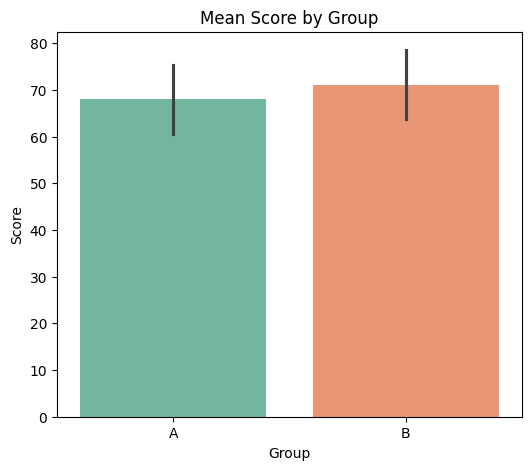

/tmp/ipython-input-1061820436.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='study_level', y='score', data=df, ci='sd', palette='Set3')
/tmp/ipython-input-1061820436.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='study_level', y='score', data=df, ci='sd', palette='Set3')


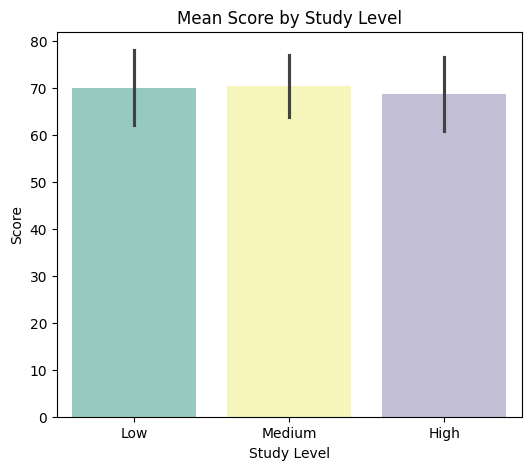

/tmp/ipython-input-1061820436.py:31: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='group', y='score', hue='study_level', data=df, ci='sd', palette='Set1')


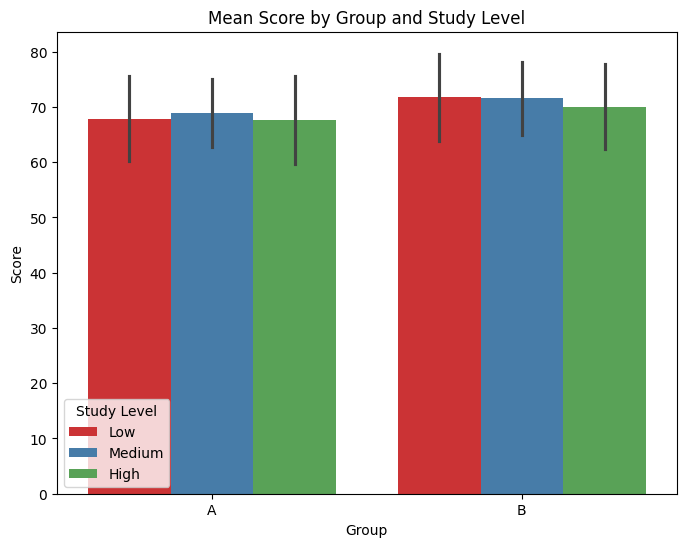

In [ ]:
#  Plot Mean Scores
# -----------------------------
# 6.1 Plot Group Means

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd


plt.figure(figsize=(6,5))
sns.barplot(x='group', y='score', data=df, ci='sd', palette='Set2')
plt.title('Mean Score by Group')
plt.ylabel('Score')
plt.xlabel('Group')
plt.show()

# 6.2 Plot Study Level Means
plt.figure(figsize=(6,5))
sns.barplot(x='study_level', y='score', data=df, ci='sd', palette='Set3')
plt.title('Mean Score by Study Level')
plt.ylabel('Score')
plt.xlabel('Study Level')
plt.show()

# 6.3 Plot Interaction: Group x Study Level
plt.figure(figsize=(8,6))
sns.barplot(x='group', y='score', hue='study_level', data=df, ci='sd', palette='Set1')
plt.title('Mean Score by Group and Study Level')
plt.ylabel('Score')
plt.xlabel('Group')
plt.legend(title='Study Level')
plt.show()